### Import Section

In [116]:
import nltk
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Finding dataset absolute path

In [117]:
current_folder = globals()['_dh'][0]
data_folder = current_folder[0:len(current_folder)-1] 
data_folder = data_folder + '0\\data\\Newcastle.csv' 

### Reading CSV file

In [118]:
df = pd.read_csv(data_folder)
df


,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Prerequisite,Required Skills,Outcome,References,Scores,Description,Projects,University Homepage,Course Homepage,Professor Homepage
0,University of Newcastle,NU,"Architecture, Planning and Landscape",Planning Contexts,20,Dr Alexander Wilson,This module introduces the hybridity of the pl...,NaN,NaN,NaN,NaN,NaN,Students will be introduced to key ideas throu...,The first assignment enables the students to r...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
1,University of Newcastle,NU,"Architecture, Planning and Landscape",Participation: Theories & Practice,20,Mrs Armelle Tardiveau,This module aims to get you to:\r\na. D...,NaN,NaN,NaN,NaN,NaN,Initial lectures contextualise the theory that...,Assignment One\r\nGroup presentation showcasin...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
2,University of Newcastle,NU,"Architecture, Planning and Landscape",Alternative Practice: Co-producing Space,20,Mr Daniel Mallo,Alternative Practice: Co-producing Space explo...,NaN,NaN,NaN,NaN,NaN,Initial lecture introduces the module and will...,The co-production project addresses a real iss...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
3,University of Newcastle,NU,"Architecture, Planning and Landscape",Introduction to Architecture,20,Professor Katie Lloyd Thomas,To enable students to:\n\r\nDevelop an awarene...,NaN,NaN,NaN,NaN,NaN,In semester 1 a mixture of scheduled and struc...,The poster – or pamphlet explaining a historic...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
4,University of Newcastle,NU,"Architecture, Planning and Landscape",Architectural Representation 2,10,Dr Carlos Calderon,The aims of the module are to enable students ...,NaN,NaN,NaN,NaN,NaN,"The topics are explored through lectures, pres...","A structured approach to 2D CAD drawings, 3D c...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,University of Newcastle,NU,Natural and Environmental Sciences,Ecology of Marine Systems,20,Dr Jane Delany,To build on the fundamentals of the functionin...,NaN,NaN,NaN,NaN,NaN,Lectures and supporting materials are designed...,The two 1000-word (or equivalent) pieces of fo...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
1321,University of Newcastle,NU,Natural and Environmental Sciences,Applied Marine Biology,20,Dr Gary Caldwell,This module aims to make students aware of a r...,NaN,NaN,NaN,NaN,NaN,The lectures are designed to provide students ...,The module offers the students the choice of o...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
1322,University of Newcastle,NU,Natural and Environmental Sciences,Research and Employability Skills,20,Dr Heather Sugden,To introduce and practice the development of h...,NaN,NaN,NaN,NaN,NaN,Lectures and practicals are designed to provid...,Students will be expected to undertake formati...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN
1323,University of Newcastle,NU,Natural and Environmental Sciences,Marine Practical Skills II,20,Dr Guenther Uher,"To build on the fundamental laboratory, boat w...",NaN,NaN,NaN,NaN,NaN,"Lectures, laboratory practicals, fieldwork and...","The formative laboratory, field and research v...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,NaN


In [119]:
for i in range(0,len(df['Unit'])):
    if(df['Unit'][i]=='5 C'):
        df['Unit'][i] = 0

C:\Users\FAAL\AppData\Local\Temp/ipykernel_6208/4030384516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit'][i] = 0


In [120]:
df['Unit'] = df['Unit'].astype('int')

In [121]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['Unit', 'Prerequisite', 'Required Skills', 'Outcome', 'References',
       'Scores', 'Professor Homepage'], dtype=object)

In [122]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['University', 'Abbreviation', 'Department', 'Course title',
       'Professor', 'Objective', 'Description', 'Projects',
       'University Homepage', 'Course Homepage'], dtype=object)

In [123]:
cols_list = list()
percentage_list = list()
for col in df.columns:
    missing_percentage = np.mean(df[col].isnull()) * 100
    cols_list.append(col)
    percentage_list.append(missing_percentage)
col_percentage = dict()
temp_percentage = percentage_list.copy()
for key in cols_list:
    for value in temp_percentage:
        col_percentage[key] = value
        temp_percentage.remove(value)
        break
col_percentage

{'University': 0.0,
 'Abbreviation': 0.0,
 'Department': 0.0,
 'Course title': 0.0,
 'Unit': 0.0,
 'Professor': 0.0,
 'Objective': 0.1509433962264151,
 'Prerequisite': 100.0,
 'Required Skills': 100.0,
 'Outcome': 100.0,
 'References': 100.0,
 'Scores': 100.0,
 'Description': 0.7547169811320755,
 'Projects': 0.7547169811320755,
 'University Homepage': 0.0,
 'Course Homepage': 0.0,
 'Professor Homepage': 100.0}

<AxesSubplot:>

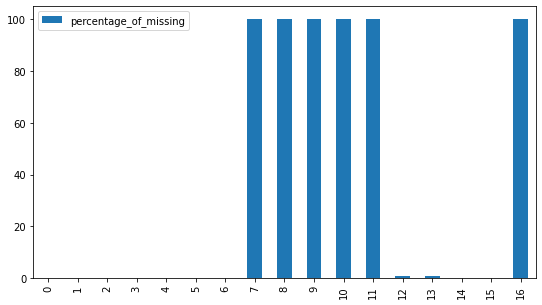

In [124]:
missing_percentage_DataFrame = pd.DataFrame()
missing_percentage_DataFrame['col'] = cols_list
missing_percentage_DataFrame['percentage_of_missing'] = percentage_list

missing_percentage_DataFrame.plot(kind='bar',figsize=(9, 5))

### Removing null values in columns with low missing percentages

In [125]:

less_missing_values_cols_list = list(
    missing_percentage_DataFrame.loc[(missing_percentage_DataFrame.percentage_of_missing < 0.5)
                                     & (missing_percentage_DataFrame.percentage_of_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)


### Dropping columns with more than 40% null values

In [126]:
_40_pct_missing_cols_list = list(
    missing_percentage_DataFrame.loc[missing_percentage_DataFrame.percentage_of_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)
df

,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Description,Projects,University Homepage,Course Homepage
0,University of Newcastle,NU,"Architecture, Planning and Landscape",Planning Contexts,20,Dr Alexander Wilson,This module introduces the hybridity of the pl...,Students will be introduced to key ideas throu...,The first assignment enables the students to r...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
1,University of Newcastle,NU,"Architecture, Planning and Landscape",Participation: Theories & Practice,20,Mrs Armelle Tardiveau,This module aims to get you to:\r\na. D...,Initial lectures contextualise the theory that...,Assignment One\r\nGroup presentation showcasin...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
2,University of Newcastle,NU,"Architecture, Planning and Landscape",Alternative Practice: Co-producing Space,20,Mr Daniel Mallo,Alternative Practice: Co-producing Space explo...,Initial lecture introduces the module and will...,The co-production project addresses a real iss...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
3,University of Newcastle,NU,"Architecture, Planning and Landscape",Introduction to Architecture,20,Professor Katie Lloyd Thomas,To enable students to:\n\r\nDevelop an awarene...,In semester 1 a mixture of scheduled and struc...,The poster – or pamphlet explaining a historic...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
4,University of Newcastle,NU,"Architecture, Planning and Landscape",Architectural Representation 2,10,Dr Carlos Calderon,The aims of the module are to enable students ...,"The topics are explored through lectures, pres...","A structured approach to 2D CAD drawings, 3D c...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
...,...,...,...,...,...,...,...,...,...,...,...
1320,University of Newcastle,NU,Natural and Environmental Sciences,Ecology of Marine Systems,20,Dr Jane Delany,To build on the fundamentals of the functionin...,Lectures and supporting materials are designed...,The two 1000-word (or equivalent) pieces of fo...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
1321,University of Newcastle,NU,Natural and Environmental Sciences,Applied Marine Biology,20,Dr Gary Caldwell,This module aims to make students aware of a r...,The lectures are designed to provide students ...,The module offers the students the choice of o...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
1322,University of Newcastle,NU,Natural and Environmental Sciences,Research and Employability Skills,20,Dr Heather Sugden,To introduce and practice the development of h...,Lectures and practicals are designed to provid...,Students will be expected to undertake formati...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
1323,University of Newcastle,NU,Natural and Environmental Sciences,Marine Practical Skills II,20,Dr Guenther Uher,"To build on the fundamental laboratory, boat w...","Lectures, laboratory practicals, fieldwork and...","The formative laboratory, field and research v...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...
